In [2]:
cd ..

SyntaxError: invalid syntax (2301172851.py, line 1)

In [38]:
import utils
import hexagon
import h3
import folium

In [4]:
df = utils.read_parquet("Taxi_Trips.parquet", columns=[
    "Pickup Centroid Latitude",
    "Pickup Centroid Longitude",
    "Dropoff Centroid Latitude",
    "Dropoff Centroid Longitude"
])

In [5]:
df.dropna(inplace=True)


In [6]:
#df = df.sample(1000)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27321596 entries, 9 to 32385874
Data columns (total 5 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Pickup Centroid Latitude    float64
 1   Pickup Centroid Longitude   float64
 2   Dropoff Centroid Latitude   float64
 3   Dropoff Centroid Longitude  float64
 4   hexagon                     object 
dtypes: float64(4), object(1)
memory usage: 1.2+ GB


In [8]:
%%time
df['hexagon'] = df.apply(lambda x: h3.geo_to_h3(x["Pickup Centroid Latitude"], x["Pickup Centroid Longitude"], resolution=8), axis=1 )

CPU times: user 5min 58s, sys: 7.38 s, total: 6min 6s
Wall time: 6min 9s


In [9]:
df.head()

,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude,hexagon
9,42.009623,-87.670167,42.009623,-87.670167,882664d8cdfffff
367,41.850266,-87.667569,41.874005,-87.663518,882664cf61fffff
368,41.874005,-87.663518,41.899602,-87.633308,882664ca91fffff
369,41.850266,-87.667569,41.947792,-87.683835,882664cf61fffff
370,41.892042,-87.631864,41.900266,-87.632109,882664c1e7fffff


In [13]:
test = df.groupby("hexagon")["Pickup Centroid Latitude"].count().reset_index(name="count")


<AxesSubplot:>

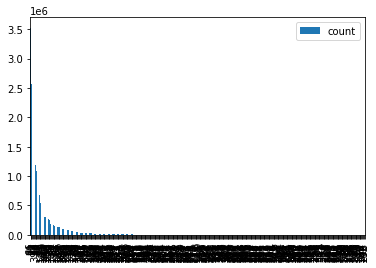

In [23]:
test.sort_values(by="count", ascending=False).plot(kind="bar")

In [50]:
test["boundaries"] = test.apply(lambda x: h3.h3_to_geo_boundary(x["hexagon"], True), axis=1)

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hexagon     408 non-null    object
 1   count       408 non-null    int64 
 2   boundaries  408 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.7+ KB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 407
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hexagon     408 non-null    object
 1   count       408 non-null    int64 
 2   boundaries  408 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.8+ KB


In [45]:
base_map = folium.Map(location=[41.66656964617557, -87.54296487952223])

In [41]:
base_map

In [43]:
#folium.GeoJson("/Users/christianbergen/Documents/prog/aaa21/data/Boundaries - Census Tracts - 2010.geojson", name="geojson").add_to(base_map)

In [46]:
base_map

In [58]:
folium.Choropleth(
    geo_data=test,
    name="chloropleth"
).add_to(base_map)

ValueError: Cannot render objects with any missing geometries:              hexagon  count                                         boundaries
0    8826641915fffff    188  ((-87.54296487952223, 41.66656964617557), (-87...
1    8826641961fffff    976  ((-87.57319298911698, 41.697560722868545), (-8...
2    8826641963fffff      8  ((-87.56847843904596, 41.69007498254173), (-87...
3    8826641b23fffff    232  ((-87.53039023937232, 41.71477318428209), (-87...
4    8826645203fffff      3  ((-87.77344545804414, 41.793388608825765), (-8...
..               ...    ...                                                ...
403  88275936b7fffff      6  ((-87.84697425084084, 41.97653768691125), (-87...
404  88275936bbfffff     43  ((-87.82885003687991, 41.98199202793128), (-87...
405  88275936cbfffff      5  ((-87.8117127241604, 42.0228959412681), (-87.8...
406  88275936d3fffff     14  ((-87.79736565084295, 42.00039388185652), (-87...
407  88275936d5fffff    882  ((-87.81360806290843, 42.008918121615224), (-8...

[408 rows x 3 columns]

In [54]:
test.dropna(inplace=True)